#Imorting Datasets#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import	KMeans
# from scipy.spatial.distance import cdist 

#Generating random uniform numbers#

In [2]:
X = np.random.uniform(0,1,50)
Y = np.random.uniform(0,1,50)

In [3]:
df_xy = pd.DataFrame(columns=["X","Y"])

In [4]:
df_xy.X = X

In [5]:
df_xy.Y = Y

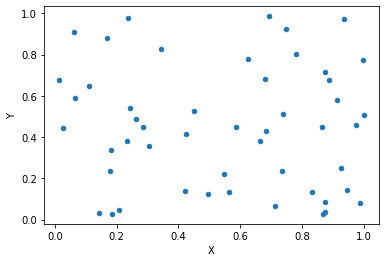

In [6]:
df_xy.plot(x="X", y="Y", kind = "scatter")

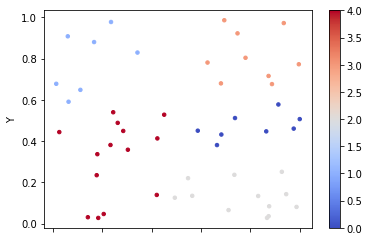

In [14]:
model1 = KMeans(n_clusters = 5).fit(df_xy)

df_xy.plot(x = "X", y = "Y", c = model1.labels_, kind="scatter", s = 12, cmap = plt.cm.coolwarm)

In [15]:
model1.labels_

array([1, 2, 4, 0, 0, 4, 4, 0, 0, 0, 2, 3, 2, 2, 4, 2, 2, 3, 1, 4, 4, 2,
       0, 3, 3, 1, 1, 2, 2, 3, 4, 4, 3, 1, 4, 0, 0, 1, 1, 2, 3, 4, 2, 4,
       2, 4, 3, 4, 4, 3], dtype=int32)

#Kmeans on University Data set#

In [16]:
Univ1 = pd.read_excel("University_Clustering.xlsx")

In [12]:
Univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [13]:
Univ = Univ1.drop(["State"], axis = 1)

# Normalization function#

In [17]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [18]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Univ.iloc[:, 1:])

# scree plot or elbow curve #

In [43]:
TWSS = []
k = list(range(2, 20))

In [44]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [45]:
TWSS

[4.12345244239718,
 2.967474100484396,
 2.2308047771916275,
 1.7285680842090176,
 1.4418427886439793,
 1.2380059526742335,
 1.0550342185222361,
 0.8712523413056232,
 0.6999838360547361,
 0.5589210638536475,
 0.46350907032190947,
 0.3549317015074797,
 0.2833617444098758,
 0.23045629088078184,
 0.18405133358134726,
 0.13635310859307617,
 0.10784782122058749,
 0.07141711401777791]

Text(0, 0.5, 'total_within_SS')

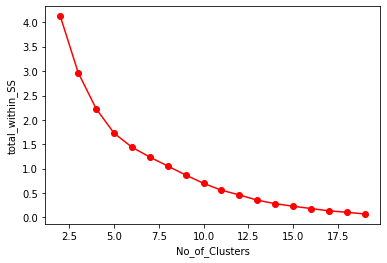

In [46]:
# Scree plot 
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [24]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [25]:
model.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0], dtype=int32)

In [26]:
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 

In [27]:
Univ['clust'] = mb # creating a  new column and assigning it to new column

In [28]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,2


In [29]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [30]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]

In [31]:
Univ.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,0,CalTech,1415,100,25,6,63575,81
2,2,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [32]:
Univ.iloc[:, 2:8].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75
2,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90


In [33]:
Univ.to_csv("Kmeans_university.csv", encoding = "utf-8")

In [34]:
import os
os.getcwd()

'/content'